In [1]:
from hashashin.metrics import compute_metrics, compute_matrices, show_similarity_matrix, hash_paths

from hashashin.main import ApplicationFactory, HashashinApplicationContext
from hashashin.classes import BinjaFeatureExtractor
from hashashin.db import HashRepository
app_context = HashashinApplicationContext(
                extractor=BinjaFeatureExtractor(),
                hash_repo=HashRepository(),
                target_path=None,
                save_to_db=True
            )
hashApp = ApplicationFactory.getHasher(app_context)

# Curl
## Matrix Norm comparison

INFO:hashashin.metrics.py:Computing signatures for [PosixPath('binary_data/libcurl/curl-7_49_0'), PosixPath('binary_data/libcurl/curl-7_66_0'), PosixPath('binary_data/libcurl/curl-7_81_0'), PosixPath('binary_data/libcurl/curl-7_9_1'), PosixPath('binary_data/libcurl/curl-7_49_1'), PosixPath('binary_data/libcurl/curl-7_68_0'), PosixPath('binary_data/libcurl/curl-7_62_0'), PosixPath('binary_data/libcurl/curl-7_78_0'), PosixPath('binary_data/libcurl/curl-7_72_0'), PosixPath('binary_data/libcurl/curl-7_53_1'), PosixPath('binary_data/libcurl/curl-7_57_0'), PosixPath('binary_data/libcurl/curl-7_76_1'), PosixPath('binary_data/libcurl/curl-7_53_0'), PosixPath('binary_data/libcurl/curl-7_59_0'), PosixPath('binary_data/libcurl/curl-7_76_0'), PosixPath('binary_data/libcurl/curl-7_65_0'), PosixPath('binary_data/libcurl/curl-7_82_0'), PosixPath('binary_data/libcurl/curl-7_61_1'), PosixPath('binary_data/libcurl/curl-7_65_1'), PosixPath('binary_data/libcurl/curl-7_61_0'), PosixPath('binary_data/libcur

Globbing binary_data/libcurl/*[0-9]_[0-9]*


INFO:hashashin.metrics.py:Done computing signatures.
INFO:hashashin.metrics.py:Converting signatures to function matrices..
Computing norms: 100%|██████████| 3364/3364 [02:37<00:00, 21.40it/s]
INFO:hashashin.metrics.py:Precision: 0.5, Recall: 1.0, F1: 0.6666666666666666


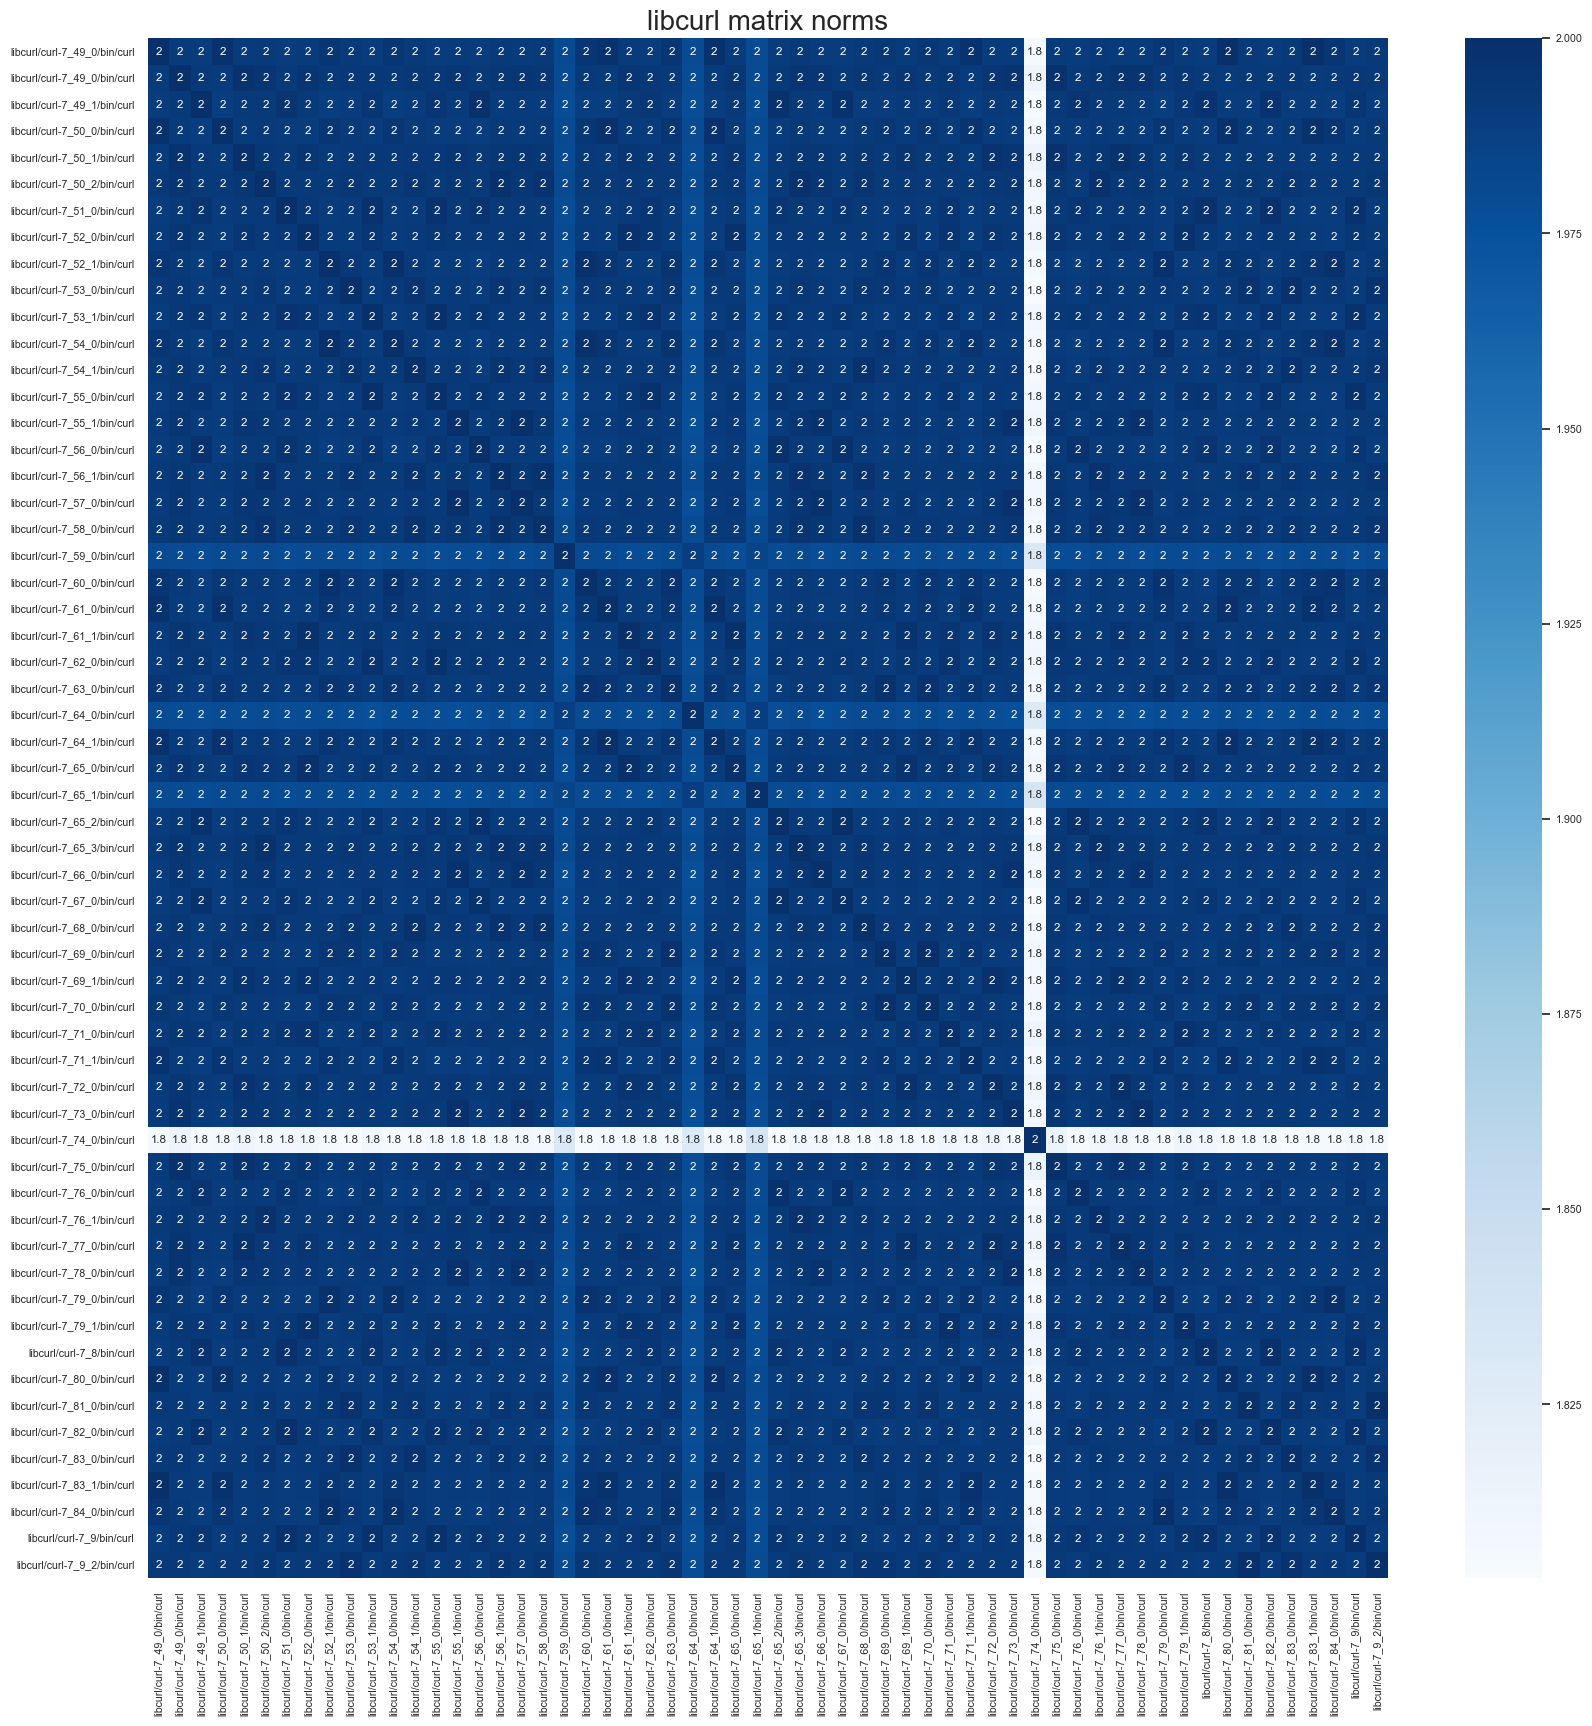

In [3]:
from hashashin.metrics import generate_matrix_norms

norms = generate_matrix_norms("libcurl", hashApp, paths="*[0-9]_[0-9]*")

In [4]:
from hashashin.metrics import show_similarity_matrix
norms

array([[2.        , 1.99134743, 1.99009288, ..., 1.99547586, 1.99060572,
        1.99257957],
       [1.99134743, 2.        , 1.99203544, ..., 1.99160156, 1.993143  ,
        1.99304481],
       [1.99009288, 1.99203544, 2.        , ..., 1.98957691, 1.99570492,
        1.99059676],
       ...,
       [1.99547586, 1.99160156, 1.98957691, ..., 2.        , 1.99004609,
        1.99338421],
       [1.99060572, 1.993143  , 1.99570492, ..., 1.99004609, 2.        ,
        1.99090672],
       [1.99257957, 1.99304481, 1.99059676, ..., 1.99338421, 1.99090672,
        2.        ]])

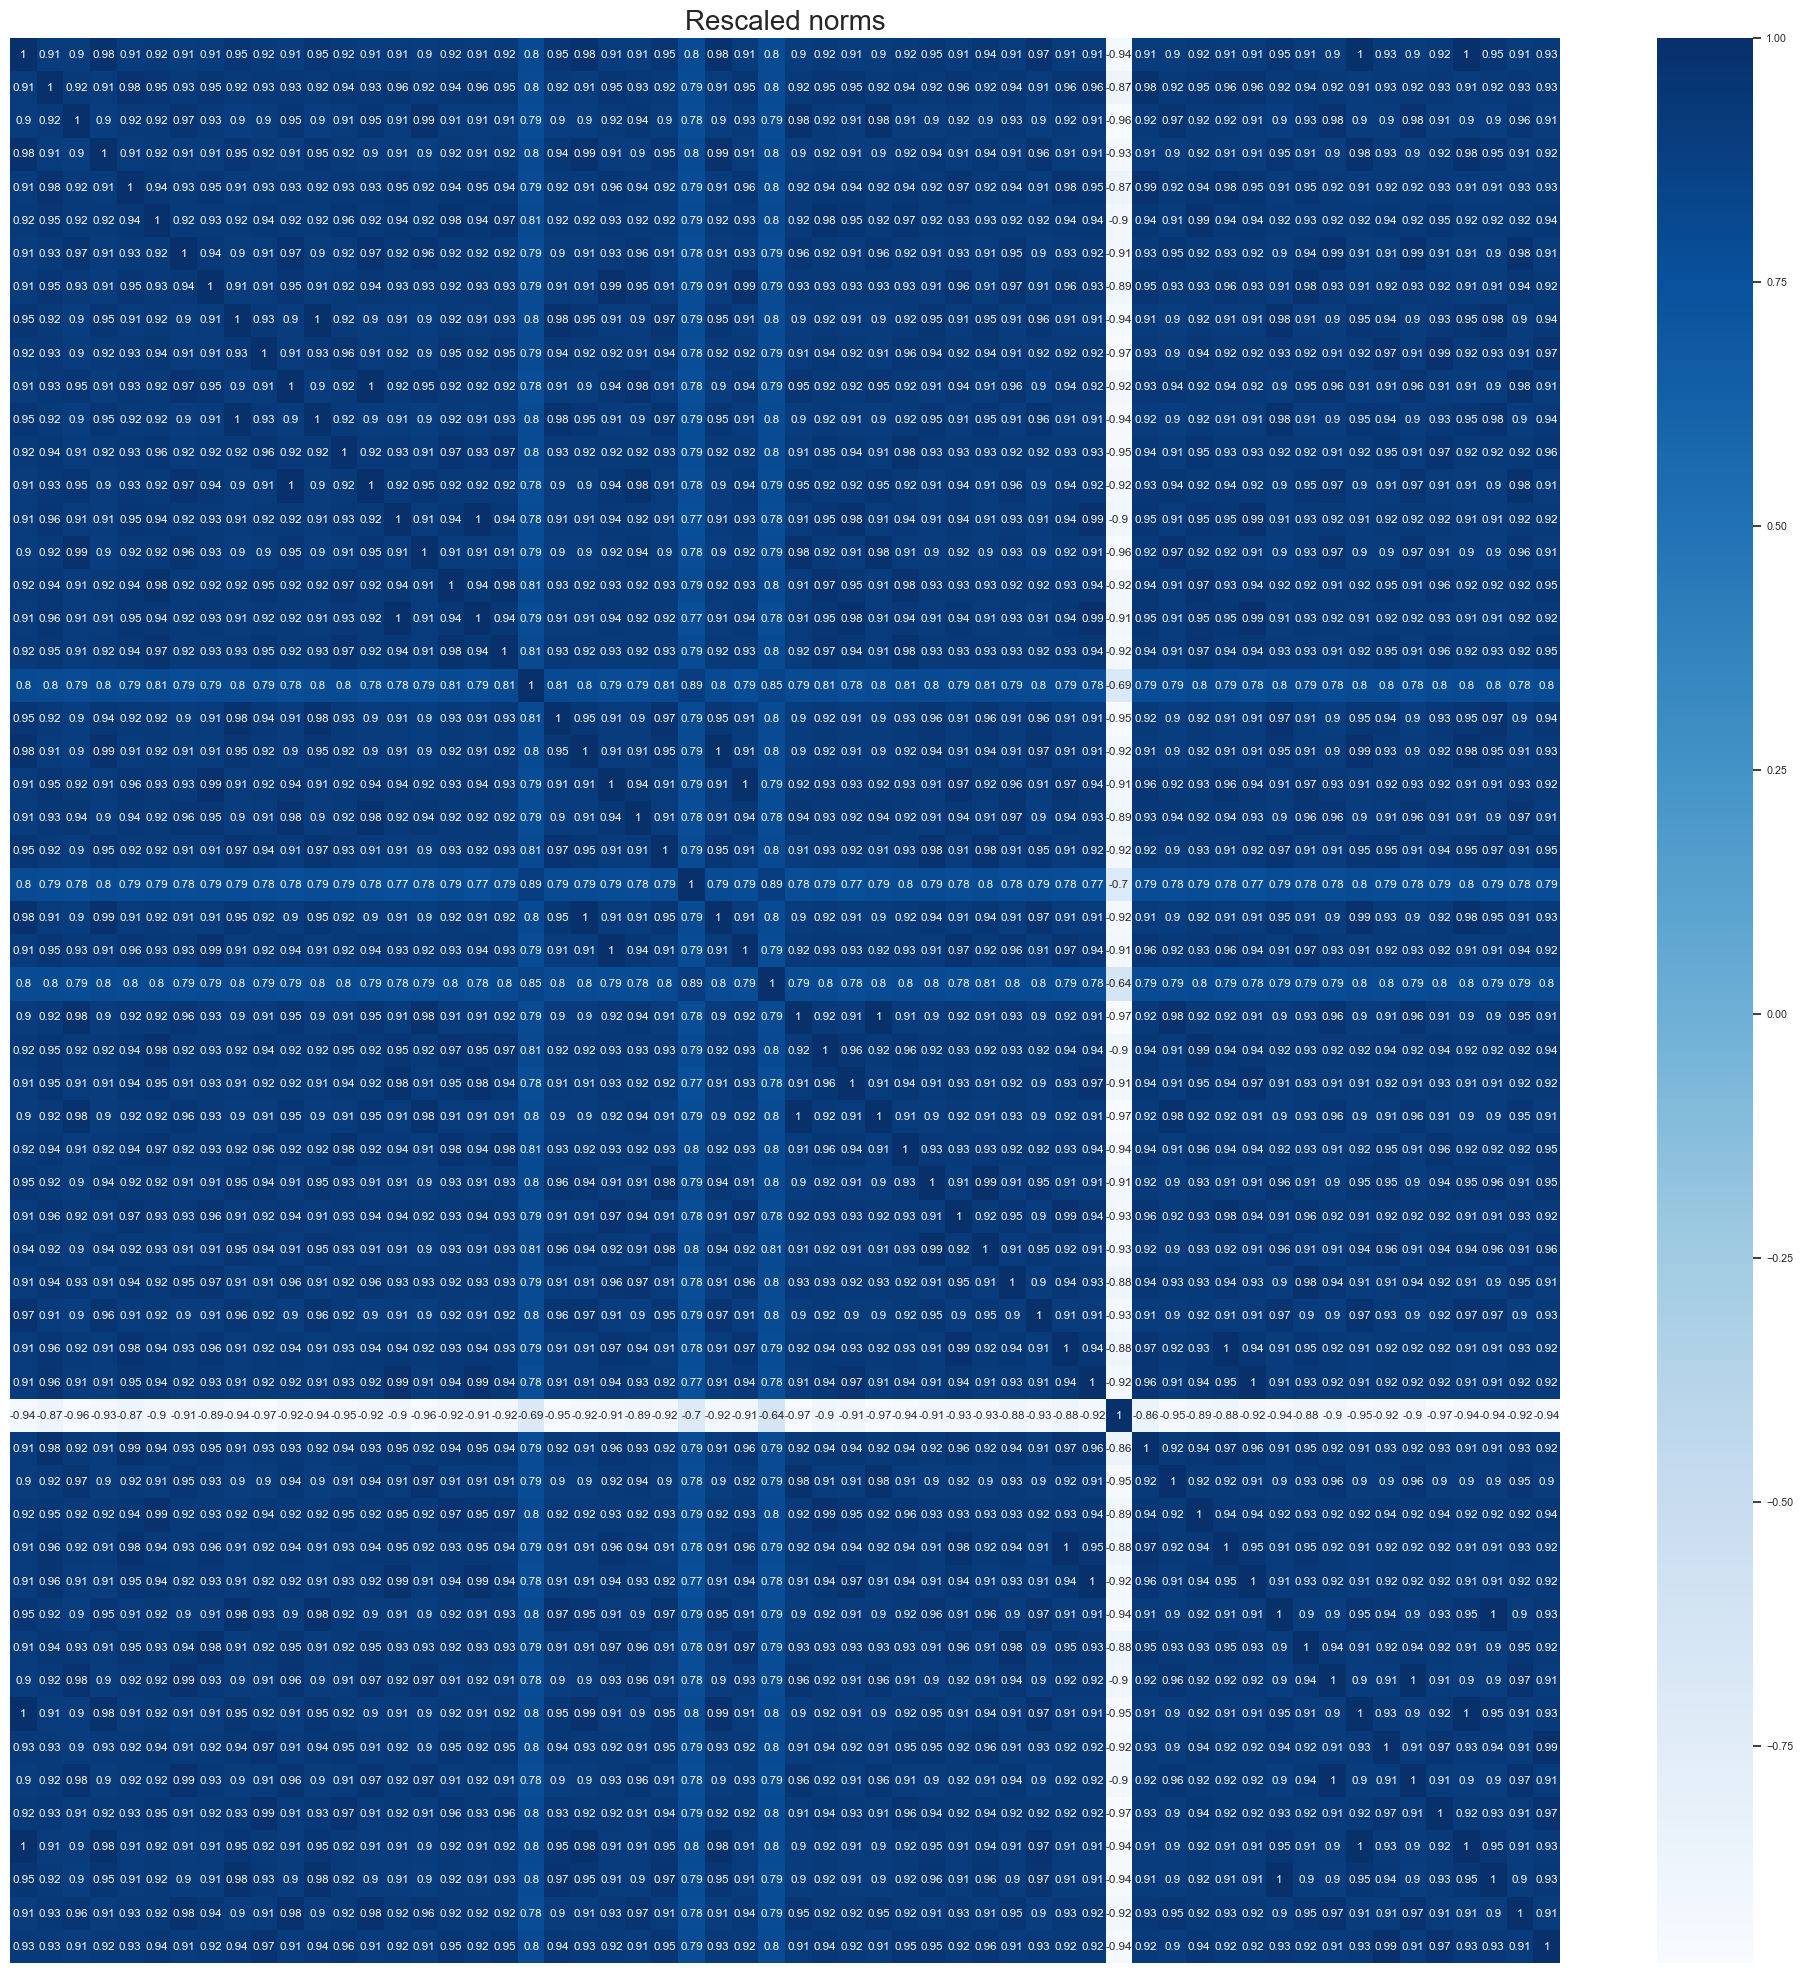

In [11]:
show_similarity_matrix((norms - 1.9) * 10, labels=[None] * len(norms), figsize=(25, 25), title="Rescaled norms")

In [14]:
import numpy as np
def reciprocal_rank_fusion(scores):
    ranks = (1 + np.arange(len(scores))) / (1 + np.argsort(np.argsort(-scores)))
    return np.sum(1 / ranks)


In [23]:
scores = norms[0,1:]
np.argsort(scores)

array([40, 24, 27, 18,  1, 14, 51, 48, 42, 28, 31, 12, 30, 22, 55,  9,  5,
        6, 36, 34, 13, 26, 21, 47, 38, 45, 39, 16, 44,  3, 41,  0, 29, 11,
       43,  4, 32, 15,  8, 52, 17, 56, 50, 35, 33, 23, 19,  7, 10, 54, 46,
       37,  2, 20, 25, 49, 53])

## Old Comparison

In [2]:
signatures = hash_paths("libcurl", hashApp, paths="*[0-9][_][0-9]*")

minhash_similarities, jaccard_similarities, binaries = compute_matrices(
    signatures
)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

INFO:hashashin.metrics.py:Computing signatures for [PosixPath('binary_data/libcurl/curl-7_49_0'), PosixPath('binary_data/libcurl/curl-7_66_0'), PosixPath('binary_data/libcurl/curl-7_81_0'), PosixPath('binary_data/libcurl/curl-7_9_1'), PosixPath('binary_data/libcurl/curl-7_49_1'), PosixPath('binary_data/libcurl/curl-7_68_0'), PosixPath('binary_data/libcurl/curl-7_62_0'), PosixPath('binary_data/libcurl/curl-7_78_0'), PosixPath('binary_data/libcurl/curl-7_72_0'), PosixPath('binary_data/libcurl/curl-7_53_1'), PosixPath('binary_data/libcurl/curl-7_57_0'), PosixPath('binary_data/libcurl/curl-7_76_1'), PosixPath('binary_data/libcurl/curl-7_53_0'), PosixPath('binary_data/libcurl/curl-7_59_0'), PosixPath('binary_data/libcurl/curl-7_76_0'), PosixPath('binary_data/libcurl/curl-7_65_0'), PosixPath('binary_data/libcurl/curl-7_82_0'), PosixPath('binary_data/libcurl/curl-7_61_1'), PosixPath('binary_data/libcurl/curl-7_65_1'), PosixPath('binary_data/libcurl/curl-7_61_0'), PosixPath('binary_data/libcur

Globbing binary_data/libcurl/*[0-9][_][0-9]*


INFO:hashashin.metrics.py:Done computing signatures.
INFO:hashashin.metrics.py:Computing similarity matrix
Computing similarities: 100%|██████████| 3364/3364 [00:00<00:00, 5209.23it/s]

Minhash precision: 0.9921968787515005, recall: 1.0, f1: 0.9960831575775836
Jaccard precision: 0.9975859987929995, recall: 1.0, f1: 0.9987915407854986


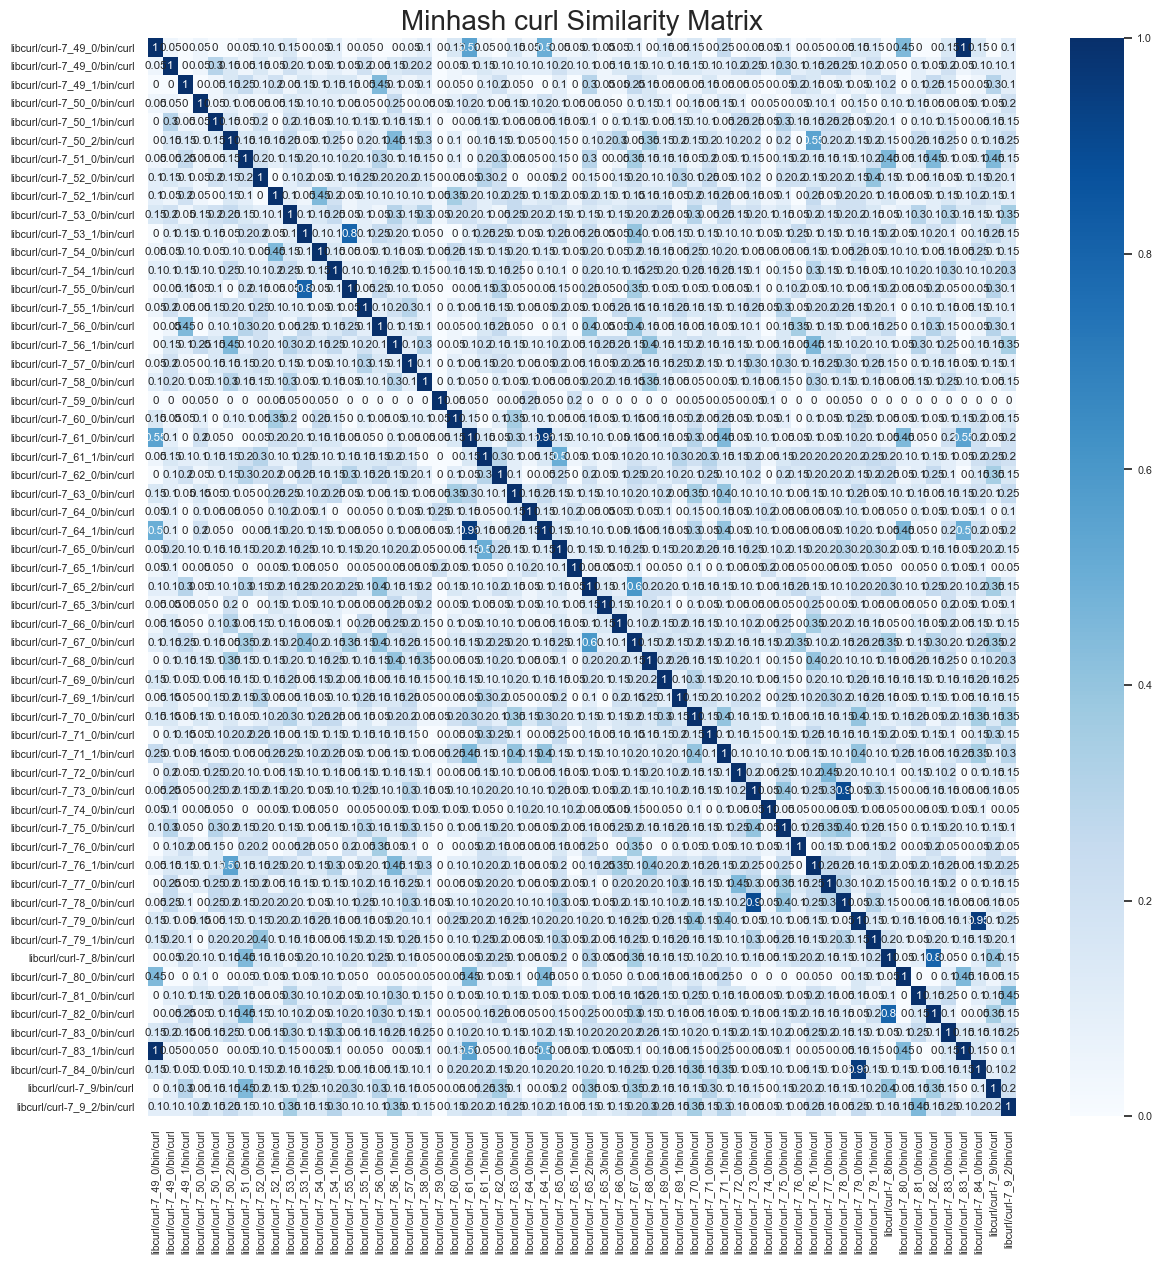

In [3]:
show_similarity_matrix(minhash_similarities, binaries, 'Minhash curl Similarity Matrix')

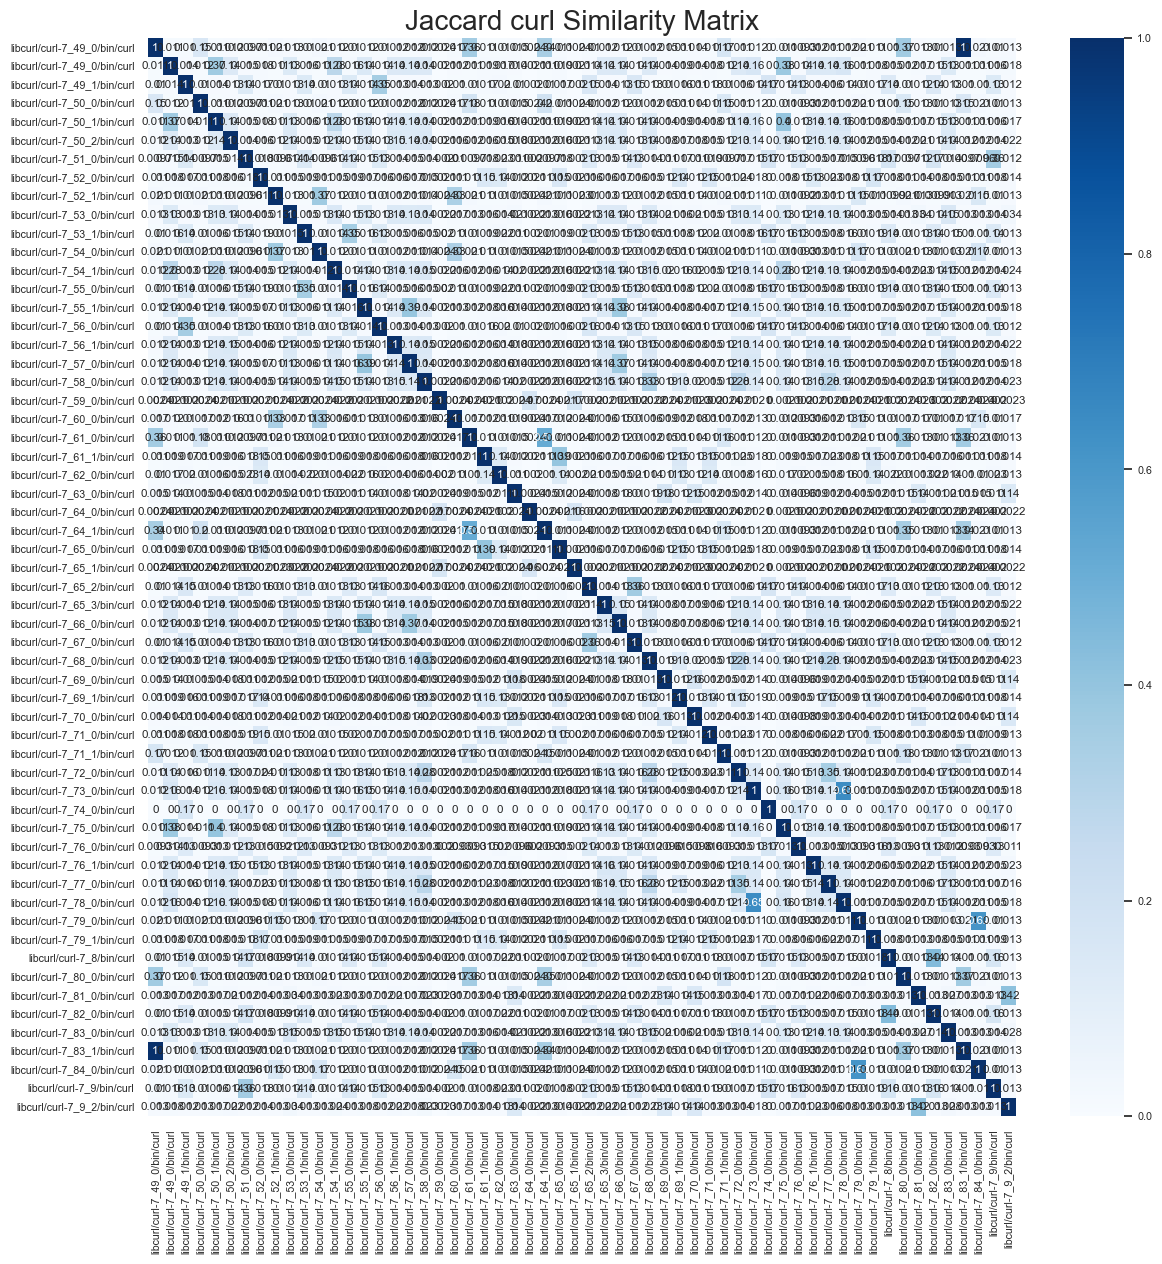

In [4]:
show_similarity_matrix(jaccard_similarities, binaries, 'Jaccard curl Similarity Matrix')

# net-snmp


In [1]:
minhash_similarities, jaccard_similarities, binaries = compute_matrices("net-snmp", hashApp)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

NameError: name 'compute_matrices' is not defined

In [ ]:
show_similarity_matrix(minhash_similarities, binaries, 'Minhash busybox Similarity Matrix')


ValueError: zero-size array to reduction operation fmin which has no identity

In [3]:
signatures = hash_paths("net-snmp", hashApp, paths="*[0-9][.][0-9]*")

minhash_similarities, jaccard_similarities, binaries = compute_matrices(
    signatures
)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)


INFO:hashashin.metrics.py:Computing signatures for [PosixPath('binary_data/net-snmp/v5.9.3'), PosixPath('binary_data/net-snmp/v5.9.2')]..
INFO:hashashin.main.py:Hashing [PosixPath('binary_data/net-snmp/v5.9.3'), PosixPath('binary_data/net-snmp/v5.9.2')]
INFO:hashashin:Iterating over 562 files. If you see this, consider using --progress.


Globbing binary_data/net-snmp/*[0-9][.][0-9]*


INFO:hashashin.main.py:Hashing 42 binaries
INFO:hashashin.metrics.py:Done computing signatures.
INFO:hashashin.metrics.py:Computing similarity matrix
Computing similarities: 100%|██████████| 1764/1764 [00:00<00:00, 4231.04it/s]

Minhash precision: 0.9451152579582877, recall: 1.0, f1: 0.971783295711061
Jaccard precision: 0.9772985244040863, recall: 1.0, f1: 0.9885189437428243


In [2]:
signatures = hash_paths("openssl", hashApp, paths="*[0-9][.][0-9]*")

minhash_similarities, jaccard_similarities, binaries = compute_matrices(
    signatures
)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)


INFO:hashashin.metrics.py:Computing signatures for [PosixPath('binary_data/openssl/openssl-3.0.1'), PosixPath('binary_data/openssl/openssl-3.0.0'), PosixPath('binary_data/openssl/openssl-3.0.5'), PosixPath('binary_data/openssl/openssl-3.0.2'), PosixPath('binary_data/openssl/openssl-3.0.3'), PosixPath('binary_data/openssl/openssl-3.0.4')]..
INFO:hashashin.main.py:Hashing [PosixPath('binary_data/openssl/openssl-3.0.1'), PosixPath('binary_data/openssl/openssl-3.0.0'), PosixPath('binary_data/openssl/openssl-3.0.5'), PosixPath('binary_data/openssl/openssl-3.0.2'), PosixPath('binary_data/openssl/openssl-3.0.3'), PosixPath('binary_data/openssl/openssl-3.0.4')]


Globbing binary_data/openssl/*[0-9][.][0-9]*


INFO:hashashin.main.py:Hashing 42 binaries


FileNotFoundError: File binary_data/openssl/openssl-3.0.1/bin/openssl(1) does not exist.